In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lexis-hackathon/True.csv
/kaggle/input/lexis-hackathon/Fake.csv


In [2]:
# Let's load and inspect the uploaded CSV files to understand their structure
import pandas as pd

# Paths to the uploaded CSV files
fake_news_path = '/kaggle/input/lexis-hackathon/True.csv'
real_news_path = '/kaggle/input/lexis-hackathon/Fake.csv'

# Loading the data
fake_news_df = pd.read_csv(fake_news_path)
real_news_df = pd.read_csv(real_news_path)

# Checking the first few rows of both datasets
fake_news_df_head = fake_news_df.head()
real_news_df_head = real_news_df.head()

# Displaying the column names and some sample data from both files
fake_news_df_head, fake_news_df.columns, real_news_df_head, real_news_df.columns


(                                               title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  
 0  December 31, 2017   
 1  December 29, 2017   
 2  December 31, 2017   
 3  December 30, 2017   
 4  December 29, 2017   ,
 Index(['title', 'text', 'subject', 'date'], dtype='object'),
               

In [3]:
# Adding a label column to each dataset to differentiate between fake and real news
fake_news_df['label'] = 0  # Label fake news as 0
real_news_df['label'] = 1  # Label real news as 1

# Combining the fake and real news dataframes into one
combined_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)

# Checking for missing values in the combined dataset
missing_values = combined_df.isnull().sum()

# Preview the combined dataset and missing value summary
combined_df.head(), missing_values


(                                               title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  label  
 0  December 31, 2017       0  
 1  December 29, 2017       0  
 2  December 31, 2017       0  
 3  December 30, 2017       0  
 4  December 29, 2017       0  ,
 title      0
 text       0
 subjec

In [4]:
# Converting the 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Now let's clean the text data by:
# - Lowercasing the text
# - Removing punctuation
# - Removing special characters

import re

# Function to clean the text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

# Apply the text cleaning function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Preview the cleaned dataset
combined_df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,WASHINGTON (Reuters) - The head of a conservat...,washington reuters the head of a conservative...
1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people will be...
2,WASHINGTON (Reuters) - The special counsel inv...,washington reuters the special counsel invest...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geo...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattlewashington reuters president donald tr...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and testing sets (80% training, 20% testing)
X = combined_df['cleaned_text']
y = combined_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Output the shape of the resulting TF-IDF matrices to ensure vectorization was successful
X_train_tfidf.shape, X_test_tfidf.shape


((35918, 5000), (8980, 5000))

In [6]:
from sklearn.model_selection import train_test_split

X = combined_df['cleaned_text']
y = combined_df['label']

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Using the top 5000 features

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9902004454342984
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [9]:
import re

# Function to clean the input text (same as used for dataset preprocessing)
def clean_input(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text

# Function to predict if the input news is fake or real
def predict_news(input_text):
    # Clean the input text
    cleaned_input = clean_input(input_text)
    
    # Vectorize the cleaned input using the TF-IDF vectorizer
    input_tfidf = tfidf_vectorizer.transform([cleaned_input])
    
    # Make the prediction (returns 0 for fake, 1 for real)
    prediction = model.predict(input_tfidf)
    
    # Return the result
    if prediction == 0:
        return "The news is Fake."
    else:
        return "The news is Real."

# Example of how to use this function
user_input = input("Enter a news article: ")
print(predict_news(user_input))


Enter a news article:  donal trump is dead


The news is Real.


In [10]:
import joblib

# Save the trained model
joblib.dump(model, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

title      0
text       0
subject    0
date       0
label      0
dtype: int64
label
0    23481
1    21417
Name: count, dtype: int64
Accuracy: 0.9899777282850779
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



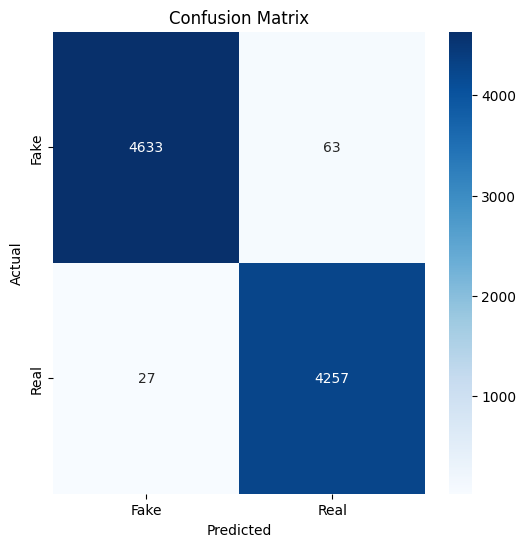

Enter a news article:  " Gay GOP Operative Endorses Doug Jones Over ‘Bigoted, Deviant’ Roy Moore In Senate Race (VIDEO)","The Republican Party has a Roy Moore problem. Even before it came out that the judge turned Alabama Senate candidate is accused of being a child molester, he was a problem. He had been removed twice from the Alabama Supreme Court for flagrantly defying the law. Moore has said Muslims should not be allowed to serve in Congress. He waved a gun around on stage at a campaign rally and rode a horse to the polls in Alabama to vote for himself in the primary he would eventually win against establishment-backed interim Senator Luther Strange. Well, it seems that with all of this and then some, sane Republicans have had enough of Roy Moore. One such person is former Jeb Bush campaign strategist Tim Miller. He  has a solution to his party s Roy Moore problem: Vote for the Democrat, Doug Jones, to keep Roy Moore the hell away from the United States Senate.Miller happens to be 

The news is Fake.


In [11]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
fake_news_path = '/kaggle/input/lexis-hackathon/Fake.csv'
real_news_path = '/kaggle/input/lexis-hackathon/True.csv'

# Loading the data
fake_news_df = pd.read_csv(fake_news_path)
real_news_df = pd.read_csv(real_news_path)

# Add label columns: 0 for fake, 1 for real news
fake_news_df['label'] = 0
real_news_df['label'] = 1

# Combine both datasets
combined_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)

# Check for missing values
print(combined_df.isnull().sum())

# Convert 'date' to datetime format (optional step, depending on the dataset)
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Apply cleaning to 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Check for class balance
print(combined_df['label'].value_counts())

# Split the dataset into features (X) and labels (y)
X = combined_df['cleaned_text']
y = combined_df['label']

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF vectorization with bigrams and more features
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Fit and transform training data, transform test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Logistic Regression model with class weight balanced
model = LogisticRegression(class_weight='balanced', C=1.0, max_iter=500)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix to visualize misclassification
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Function to clean user input
def clean_input(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Function to predict if the input news is fake or real
def predict_news(input_text):
    cleaned_input = clean_input(input_text)
    input_tfidf = tfidf_vectorizer.transform([cleaned_input])
    prediction = model.predict(input_tfidf)
    
    if prediction == 0:
        return "The news is Fake."
    else:
        return "The news is Real."

# Example usage
user_input = input("Enter a news article: ")
print(predict_news(user_input))


In [14]:
# Function to predict if the input news is fake or real
def predict_news(input_text):
    cleaned_input = clean_input(input_text)
    input_tfidf = tfidf_vectorizer.transform([cleaned_input])
    prediction = model.predict(input_tfidf)
    
    if prediction == 0:
        return "The news is Fake."
    else:
        return "The news is Real."

# Example usage
user_input = input("Enter a news article: ")
print(predict_news(user_input))


Enter a news article:  Trump 'dossier' firm: Republicans leaked bank records in retaliation,"WASHINGTON (Reuters) - A firm that commissioned a “dossier” detailing links between then-presidential candidate Donald Trump’s campaign and Russia said in a court filing that Republicans leaked the company’s banking data to the media for partisan political purposes. Democrats have said Republicans use leaks to undermine investigations into Trump’s campaign both by Congress and Special Counsel Robert Mueller. Republicans have accused Democrats of leaking information to undermine the Trump administration. Republican attacks on Mueller’s probe of U.S. allegations that Russia interfered in the 2016 election to help Trump and possible collusion with Moscow officials have included efforts to discredit the dossier. The Kremlin denies the allegations of meddling and Trump denies any collusion. Fusion GPS, in a notice to a federal judge in Washington late on Tuesday, said that a subpoena sent by the Rep

The news is Real.


In [15]:
# Save the model and vectorizer to disk
joblib.dump(model, 'ISOT_logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer, 'ISOT_tfidf_vectorizer.pkl')


['ISOT_tfidf_vectorizer.pkl']